In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:
import warnings
warnings.filterwarnings('ignore')

In [185]:
ad= pd.read_csv("application_data.csv")
pa= pd.read_csv("previous_application.csv")

In [186]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [187]:
ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [188]:
ad.shape

(307511, 122)

In [189]:
# Check null value percentage in all columns in application data
chk_null_allcol_ad=ad.isnull().sum()*100/len(ad)
chk_null_allcol_ad.sort_values(ascending=False).head()# check for head(55) till is more missing values

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
dtype: float64

In [190]:
# check for the null value percetage in all columns in previous application
chk_null_allcol_pa=pa.isnull().sum()*100/len(pa)
chk_null_allcol_pa.sort_values(ascending=False).head()# check for head(12) till is more missing values

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
RATE_DOWN_PAYMENT           53.636480
AMT_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE             49.119754
dtype: float64

In [191]:
# Check for the columns which have null value more than 50 percent in application data
row_count_50per_ad=ad.shape[0]/2
chk_cols_nullgt50_ad=ad.columns[ad.isnull().sum()>row_count_50per_ad]
print("Total null  columns more then 50% null value in application data:",len(chk_cols_nullgt50_ad))

Total null  columns more then 50% null value in application data: 41


In [192]:
# Check for the columns which have null value more than 50 percent in previous application
row_count_50per_pa=pa.shape[0]/2
chk_cols_nullgt50_pa=pa.columns[pa.isnull().sum()>row_count_50per_pa]
print("Total null  columns more then 50% null value in previous application:",len(chk_cols_nullgt50_pa))

Total null  columns more then 50% null value in previous application: 4


In [193]:
# Dropping the columns which have more then 50% of data in application data
ad=ad.drop(chk_cols_nullgt50_ad,axis=1)

In [194]:
# Dropping the columns which have more then 50% of data in previous application
pa=pa.drop(chk_cols_nullgt50_pa,axis=1)

In [195]:
# Check the shape for both data
print("shape for application data:",ad.shape)
print("shape for application data:",pa.shape)

shape for application data: (307511, 81)
shape for application data: (1670214, 33)


In [196]:
# Check for the columns which have null value less than 13 percent in application data
row_count_13per_ad=ad.shape[0]*0.13
chk_cols_nullles13_ad=ad.columns[ad.isnull().sum()<row_count_13per_ad]
print("Total null columns less then 13% null value in application data:",len(chk_cols_nullles13_ad))
print("Columns are:",chk_cols_nullles13_ad)

Total null columns less then 13% null value in application data: 65
Columns are: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
     

In [197]:
# Check for the columns which have null value less than 13 percent in previous application
row_count_13per_pa=pa.shape[0]*0.13
chk_cols_nullles13_pa=pa.columns[pa.isnull().sum()<row_count_13per_pa]
print("Total null columns less then 13% null value in previous application:",len(chk_cols_nullles13_pa))
print("Columns are:",chk_cols_nullles13_pa)

Total null columns less then 13% null value in previous application: 23
Columns are: Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [198]:
# Keep only the data with missing values 13 percent in both data
ad=ad[chk_cols_nullles13_ad]
pa=pa[chk_cols_nullles13_pa]

In [199]:
# categorical columns in application_data dataset

category_clmns_ad = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
                                     'FLAG_OWN_REALTY','CNT_CHILDREN','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                                     'REGION_RATING_CLIENT','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                                     'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','ORGANIZATION_TYPE','FLAG_MOBIL',
                                     'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_DOCUMENT_4',
                                     'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
                                     'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                                     'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                                     'WEEKDAY_APPR_PROCESS_START','CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','ORGANIZATION_TYPE',
                                     'NAME_TYPE_SUITE','REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                                     'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                                     'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                                     'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                                     'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                                     'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                                     'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Non-categorical columns in application_data dataset

non_category_clmns_ad = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                                         'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED', 
                                         'DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                         'EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE', 
                                         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 
                                         'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',]

# categorical columns in previous_application dataset

category_clmns_pa = ['SK_ID_PREV', 'SK_ID_CURR','NAME_CONTRACT_TYPE', 'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START',
                                     'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','NAME_CASH_LOAN_PURPOSE',
                                      'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 
                                      'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
                                      'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

# Non-categorical columns in previous_application dataset

non_category_clmns_pa = ['AMT_APPLICATION','AMT_CREDIT','DAYS_DECISION',
                                         'SELLERPLACE_AREA']

In [200]:
# Keep only the data with missing values 13 percent in both data
ad=ad[chk_cols_nullles13_ad]
pa=pa[chk_cols_nullles13_pa]
print(ad.shape)
print(pa.shape)

(307511, 65)
(1670214, 23)


In [201]:
# Finding the list of actual null columns from the dataframes ad ,that contains all columns which has less than 13% Null values

clmn_ad_null_cate = [i for i in ad.columns[ad.isna().any()].tolist() if i in category_clmns_ad]

print("\nList of all categorical columns that has actual missing values in among less than 13% null value columns in application_data: ", clmn_ad_null_cate)

clmn_ad_null_noncat=[i for i in ad.columns[ad.isna().any()].tolist() if i in non_category_clmns_ad]

print("\n\nList of all non categorical columns that has actual missing values in among less than 13% null value columns in application_data: ", clmn_ad_null_noncat)


List of all categorical columns that has actual missing values in among less than 13% null value columns in application_data:  ['NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS']


List of all non categorical columns that has actual missing values in among less than 13% null value columns in application_data:  ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']


In [202]:
# Finding the list of actual null columns from the dataframes pa ,that contains all columns which has less than 13% Null values
clmn_pa_null_cate = [i for i in pa.columns[pa.isna().any()].tolist() if i in category_clmns_pa]

print("\nList of all categorical columns that has actual missing values in among less than 13% null value columns in application_data: ", clmn_pa_null_cate)

clmn_pa_null_noncat=[i for i in pa.columns[pa.isna().any()].tolist() if i in non_category_clmns_pa]

print("\n\nList of all non categorical columns that has actual missing values in among less than 13% null value columns in application_data: ", clmn_pa_null_noncat)


List of all categorical columns that has actual missing values in among less than 13% null value columns in application_data:  ['PRODUCT_COMBINATION']


List of all non categorical columns that has actual missing values in among less than 13% null value columns in application_data:  ['AMT_CREDIT']


In [203]:
# Repalcing null categorical variable with mode in ad(application_data dataframe)
for i in clmn_ad_null_cate:
    ad[i].fillna(ad[i].mode()[0],inplace=True)

In [204]:
# Repalcing null non-categorical variable with mode in pa(previous application dataframe)
for i in clmn_pa_null_cate:
    pa[i].fillna(pa[i].mode()[0],inplace=True)

In [205]:
# Finding Outliers
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_ad = ad.select_dtypes(include=numerics)
num_pa = pa.select_dtypes(include=numerics)

# We are not considering the numerical columns that are categorical, in detecting outliers.

categorical_num_columns_ad = ['SK_ID_CURR','TARGET','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                           'FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                           'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
                           'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
                           'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
                           'FLAG_DOCUMENT_21'] 

categorical_num_columns_pa = ['SK_ID_PREV','SK_ID_CURR','NFLAG_LAST_APPL_IN_DAY']

In [206]:
# Removing the numerical_categorical columns 
num_ad = num_ad.drop(columns=categorical_num_columns_ad)
num_pa = num_pa.drop(columns=categorical_num_columns_pa)

In [207]:
clmn_ad_non_cate_outlier = num_ad.columns[((num_ad.std()/num_ad.mean())*100).abs()>85].tolist()

print("Columns that has outliers in application_data.csv, \nwhich has a standard deviation of more than 85% from its mean:\n\n ", clmn_ad_non_cate_outlier)

clmn_pa_non_cate_outlier = num_pa.columns[((num_pa.std()/num_pa.mean())*100).abs()>85].tolist()

print("\nColumns that has outliers in previous_application.csv, \nwhich has a standard deviation of more than 85% from its mean:\n\n", clmn_pa_non_cate_outlier)

Columns that has outliers in application_data.csv, 
which has a standard deviation of more than 85% from its mean:

  ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']

Columns that has outliers in previous_application.csv, 
which has a standard deviation of more than 85% from its mean:

 ['AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION', 'SELLERPLACE_AREA']


In [208]:
# Dealing with the missing values in non categoricalvariables that has outliers:

# Preparing a list containing null, non-categoricall variables containing outliers in application_data
clmn_ad_null_non_cate_outlier = [i for i in clmn_ad_null_noncat if i in clmn_ad_non_cate_outlier]

# Preparing a list containing null, non-categoricall variables containing outliers in previous_application

clmn_pa_null_non_cate_outlier = [i for i in clmn_pa_null_noncat if i in clmn_pa_non_cate_outlier]

In [209]:
# Replacing null,non-categorical variable (having outliers) with median in application_data dataframe

for i in clmn_ad_null_non_cate_outlier:
    ad[i].fillna(ad[i].median(),inplace=True)

# Replacing null,non-categorical variable (having outliers) with median in previous_application dataframe

for i in clmn_pa_null_non_cate_outlier:
    pa[i].fillna(pa[i].median(),inplace=True)
    
    

In [210]:
#Deling with the missing values in non-categorical variables that does not have outliers
## Preparing a list containing null, non-categoricall variables containing no outliers in application_data

clmn_ad_null_non_cate_no_outlier = [i for i in clmn_ad_null_noncat if i not in clmn_ad_null_non_cate_outlier]

# Preparing a list containing null, non-categoricall variables containing no outliers in previous_application

clmn_pa_null_non_cate_no_outlier = [i for i in clmn_pa_null_noncat if i not in clmn_pa_null_non_cate_outlier]

In [211]:
# Replacing null,non-categorical variable (having no outliers) with mean in application_data dataframe
for i in clmn_ad_null_non_cate_no_outlier:
    ad[i].fillna(ad[i].mean(),inplace=True)
    
# Replacing null,non-categorical variable (having no outliers) with mean in previous_application dataframe
for i in clmn_pa_null_non_cate_no_outlier:
    pa[i].fillna(pa[i].mean(),inplace=True)

In [212]:
# Check if is there any null values left out

print('Is there any null values in df_application_data: ',ad.isnull().values.any())
print('Is there any null values in df_previous_application: ',pa.isnull().values.any())
       

Is there any null values in df_application_data:  False
Is there any null values in df_previous_application:  False


In [213]:
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


# STEPS TO BE BORROWED & MERGED

In [214]:
### Analysis to be carried out:
#By Analysing the given datasets we could sense that the columns which gives direct information on the loan approval/rejection are 'Target' and 'NAME_CONTRACT_STATUS' repectively on 'application_data.csv' and 'Previous_application.csv'. Further, I'm gonna perform univariate and bi-variate analysis to get more insight on these columns and the co-relation with the other columns, so that, we can understand how loan approval/rejection is estimated, and which are the cariables influences this.

In [ ]:
##Finding if there is Imbalance in data
# as per our problem statement and with the given data sets we need to check whether a person will going to pay the loan amount or will become a defaulter.
# to find that we need to feed the data to our understnding and model with the help of the data sets provided to us.

# If the data is imbalanced, means if the data what provided to us have details of the person who are defaulters then the model what we will goin to build will
# be an unbiased one and vice versa
# Since we are concentrated much on the 'Tareget' variable to detect whether to approve/reject loan, we are going to focus on finding if there is any imbalance on this variable.

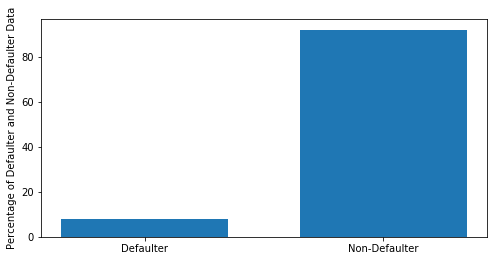

Ratios of imbalance in percentage with respect to non-defaulter and defaulter datas are: 91.927118 and 8.072882
Ratios of imbalance in real-numbers with respect to non-defaulter and defaulter datas is 11.387150 : 1 (approx)


In [217]:
count_1=0
count_0=0

for i in ad.TARGET.values:
    if i==1:
        count_1=count_1+1
    else:
        count_0=count_0+1

count_1_per= (count_1/(count_1+count_0))*100
count_0_per= (count_0/(count_1+count_0))*100

x=['Defaulter','Non-Defaulter']
y=[count_1_per,count_0_per]

plt.figure(figsize=[8,4])
plt.bar(x,y,width=0.7)
plt.ylabel('Percentage of Defaulter and Non-Defaulter Data')
plt.show()

print('Ratios of imbalance in percentage with respect to non-defaulter and defaulter datas are: %f and %f'%(count_0_per,count_1_per))
print('Ratios of imbalance in real-numbers with respect to non-defaulter and defaulter datas is %f : 1 (approx)'%(count_0/count_1))

In [ ]:
#From the above graph we can very clearly see that there is an imbalabce between the defaulters data and the non-defaulters.
#As mentioned earlier, imbalance of data will tend to create a biased model. One best technique to avoid the curse of imbalanced data is by undersampling the larger classified dataset and by oversampling the less classified dataset. So that, the final dataset will have a balanced/equal number of data among all the labels.

In [ ]:
##Dividing the data into two sets, i.e. Target=1 and Target=0 for application_data

In [218]:
ad_T_0 = ad[ad.TARGET == 0]
ad_T_1 = ad[ad.TARGET == 1]


In [ ]:
##Dividing the data into two sets, i.e. Target=1 and Target=0 for previous_application dataset
#Creating a target variable for the previous_application dataset
#In order to create a target varible in prev_app_data we are going to consider the column: NAME_CONTRACT_STATUS
#We are going classify the status 'Refused' as 1 and 'Approved' as 0. The reason for this assumption is that if the previous company rejects the loan for a person then the only reason for doing so is that the company would have sensed that the person might be having payment difficulties. In other hand, if the previous company approved the loan for a person then the only reason would be that the company would have sensed that the person whould not have any payment difficulties.
#We are going to remove all other rows where the status is 'cancelled' or 'unused offer'

In [219]:
prev_target=[] 

for i in pa['NAME_CONTRACT_STATUS'].tolist():
    if i=='Approved':
        prev_target.append(0)
    elif i=='Refused':
        prev_target.append(1)
    else:
        prev_target.append(None)
        
# Creting a 'Target' variable with  Approved = 0, Refused = 1, all other as Null
pa['TARGET']=prev_target

pa=pa.loc[(pa['TARGET']==1) | (pa['TARGET']==0)]
pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest,0.0
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low,0.0
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high,0.0
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle,0.0
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high,1.0


In [220]:
# Dividing the previous application data into two set
pa_T_0=pa[pa['TARGET']==0]
pa_T_1=pa[pa['TARGET']==1]